In [176]:
# proxies for internet access on the cluster
%env http_proxy=http://proxy-default:3128
%env https_proxy=http://proxy-default:3128
%env ftp_proxy=http://proxy-default:3128

import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets seaborn default "prettyness:
sns.set_style("ticks")
# scale plots
sns.set_context("paper")
import matplotlib as mpl
scale = 0.8
d = dict([(k, v*scale) for (k, v) in sns.plotting_context('paper').items()])
d['figure.figsize'] = [5.4, 3.5]
mpl.rcParams.update(d)

env: http_proxy=http://proxy-default:3128
env: https_proxy=http://proxy-default:3128
env: ftp_proxy=http://proxy-default:3128


In [94]:
-np.log10(0.05), -np.log10(5e-8), -np.log10(5e-8*3100/156)

(1.3010299956639813, 7.301029995663981, 6.00279290018417)

# Exploration of power

In [276]:
import random
from numpy.random import choice, shuffle
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

def get_data(n=60, p=0.5, nr_shuffle=20):
    
    # data = choice([0, 1], n, p=[0.7, 0.3])
    weights = [p, 1-p]
    data = np.concatenate([choice([0, 1], n//2, p=weights), choice([0, 1], n//2, p=weights[::-1])])
    i, j = n//2 - nr_shuffle//2, n//2 + nr_shuffle//2
    a, b, c = data[:i], data[i:j], data[i:]
    shuffle(b)
    data = np.concatenate([a, b, c])
    return data

with np.printoptions(threshold=5000, linewidth=200):
    print(np.array([get_data() for _ in range(10)]))

[[0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1]
 [1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0]
 [1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1]
 [0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1]
 [0 1 0 0 1 1 0 1 0 0 

**Ones do not tend to come first because there are more of them, conditioned on the known total number of each**

[[0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0

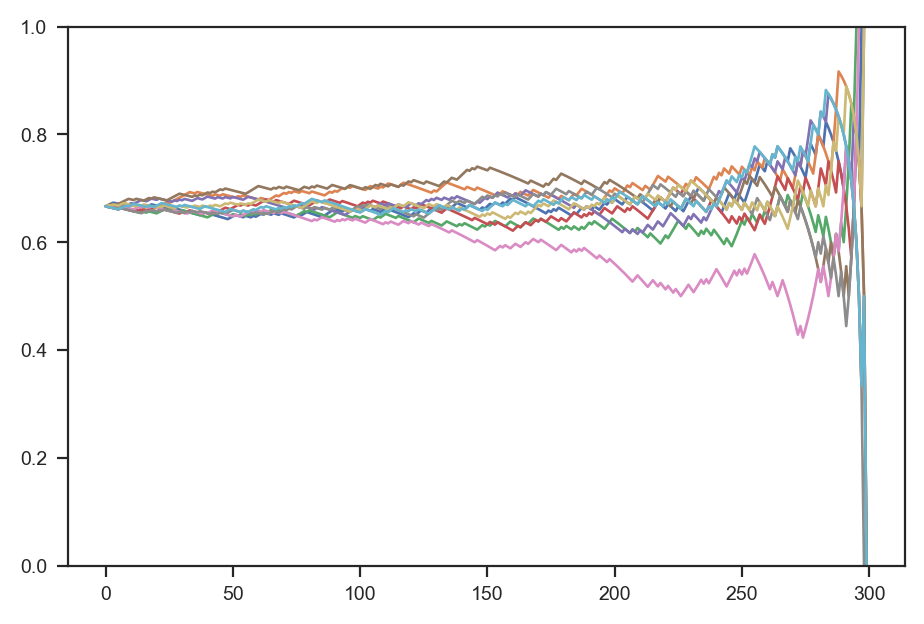

In [356]:
for _ in range(10):
    ones = 200
    zeros = 100
    probs = []
    while ones+zeros:
        p = ones/(ones+zeros)
        probs.append(p)
        if random.random() < p:
            ones -= 1
        else:
            zeros -= 1
    plt.plot(probs) 
plt.ylim(0, 1) ;

def get_data():
    ones = 10
    zeros = 40
    data = []
    while ones+zeros:
        p = ones/(ones+zeros)
        if random.random() < p:
            ones -= 1
            data.append(1)
        else:
            zeros -= 1
            data.append(0)
    return data

with np.printoptions(threshold=5000, linewidth=200):
    print(np.array([get_data() for _ in range(20)]))

# problem: derived kommer altid senere fordi de er usandsynlige og man skal vente længere på dem

# - Ikke rigtigt. hvor hver ny rec event man sampler er der den samme (lille) sandsynlighed for at det er en derived. De skal altså have en konstant fordeling over ranks

# men hov, så forventer vi jo slet ikke at derived kommer senere i rank...

# Måske kan man bruge det til noget at derived rec måske er sjældnere en forventet baseret på antallet af derived blade...? Hvad er der/(der+anc) ratioen af recombs normaliseret med hvor mange der og anc grene der skal være (muligvis minus den gren mutation er sket på)

# Idea: rank order permutation test of clade widths stratified by nr of leaves in the clade. Could show if same-size der clades are wider than anc clades...

In [395]:
from permute.stratified import stratified_permutationtest_mean

stratified_permutationtest_mean(np.array(data), np.array(data), np.array(data))

nan

0.9528


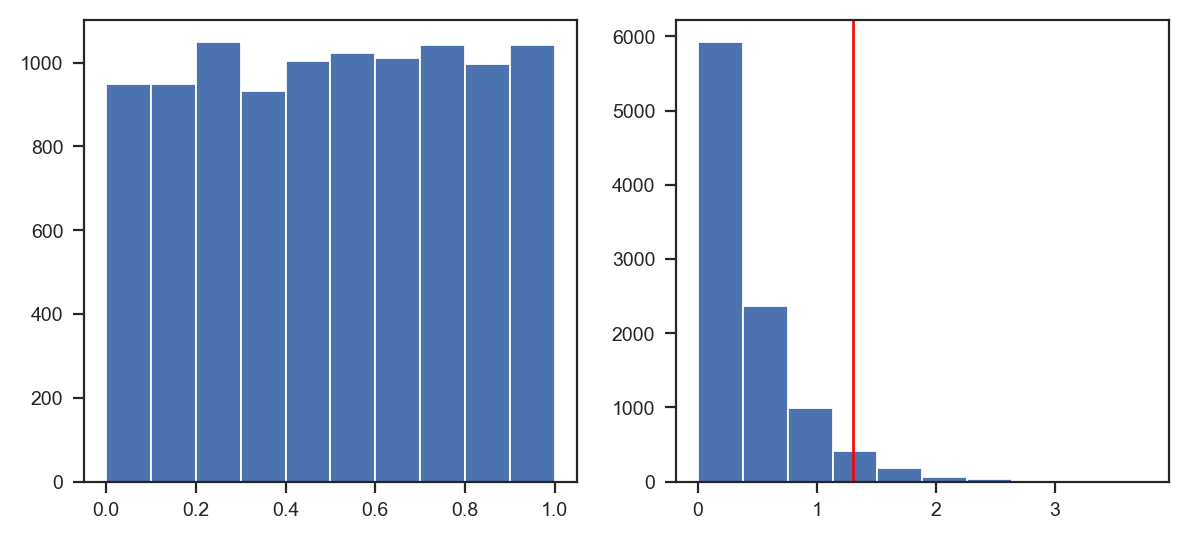

In [350]:
def test():
    
    data = get_data()
    
    zero_ranks = [i+1 for (i, x) in enumerate(data) if x == 0]
    one_ranks = [i+1 for (i, x) in enumerate(data) if x == 1]

    statistic, p_value = stats.mannwhitneyu(zero_ranks, one_ranks, alternative='less')
    return p_value

p_values = np.array([test() for _ in range(10000)])
print((p_values > 0.05).sum()/p_values.size)
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].hist(p_values)
ax[1].hist(-np.log10(p_values))
ax[1].axvline(-np.log10(0.05), color='red') ;

# Compute the statistic from flank ranges

In [ ]:
def get_data():

    n = 20
    
    # dummy data
    der_clade_extents = np.array(list(zip(np.random.randint(0, 10000, n//2), np.random.randint(10000, 20000, n//2))))
    anc_clade_extents = np.array(list(zip(np.random.randint(0, 10000, n//2), np.random.randint(10000, 20000, n//2))))

#     # spike in some non-random data
#     der_clade_extents = np.concatenate([der_clade_extents, np.random.randint(20000, 30000, (10, 2))])
# #    anc_clade_extents = np.concatenate([anc_clade_extents, np.random.randint(0, 1000, (10, 2))])

    return der_clade_extents, anc_clade_extents


def test():
    # focal pos
    pos = 10000

    # dummy data
    der_clade_extents, anc_clade_extents = get_data()

    # produce rankings of 0 and 1 (anc and der)
    merged = [] 
    merged.extend([(x, 1) for x in np.absolute((der_clade_extents - pos).flatten())])
    merged.extend([(x, 0) for x in np.absolute((anc_clade_extents - pos).flatten())])
    # do not count clades that end at same pos (these are children of a removed node)
    merged = list(set(merged)) 
    data = [x[1] for x in sorted(merged)] 
    zero_ranks = [i for (i, x) in enumerate(data) if x == 0]
    one_ranks = [i for (i, x) in enumerate(data) if x == 1]

    statistic, p_value = stats.mannwhitneyu(zero_ranks, one_ranks, alternative='less')
    return p_value

p_values = np.array([test() for _ in range(10000)])
print((p_values < 0.05).sum()/p_values.size)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].hist(p_values)
ax[1].hist(-np.log10(p_values))
ax[1].axvline(-np.log10(0.05), color='red') ;

In [326]:
# lst = ([1] * 10) + ([0]*10)
lst = np.random.randint(0, 2, 20).tolist()
probs = []
tot_prob = 1
while lst:
    p = sum(lst)/len(lst)
    # if p == 0:
    #     break
    x = lst.pop(0)
    if x == 1:
        prob = p
    else:
        prob = 1 - p
    probs.append(prob)
    tot_prob *= prob
probs, tot_prob, -2 * np.log(probs).sum()

([0.65,
  0.631578947368421,
  0.6111111111111112,
  0.4117647058823529,
  0.625,
  0.6,
  0.5714285714285714,
  0.46153846153846156,
  0.41666666666666663,
  0.6363636363636364,
  0.6,
  0.5555555555555556,
  0.5,
  0.5714285714285714,
  0.5,
  0.6,
  0.5,
  0.6666666666666667,
  0.5,
  1.0],
 1.2899896800825591e-05,
 22.516582493129295)

# Null hypothesis expectations

- Drived branches will be lower in the tree and are thus removed more easily by few recombination events. So this will reduce the proportion of 1's in the rank lists

# Alternative hypothesis expectations
- In a sweep clade, the recombinations will also tend to remove fewer inner nodes at a time becuse external branches will be longer. So there will be more individual recombinations affecting derived than ancestral (controlling for the number of branches)
- 
